In [1]:
>>> import numpy as np
>>> import pandas as pd
>>> import statsmodels.api as sm
>>> import matplotlib.pyplot as plt
>>> %matplotlib inline

In [2]:
>>> df = pd.read_csv('Electric_Production.csv')
>>> df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [3]:
>>> df.columns = ['Date','Production']
>>> df.head()

,Date,Production
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
>>> df.set_index('Date',inplace=True)
>>> df.head()

,Production
Date,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


<AxesSubplot:xlabel='Date'>

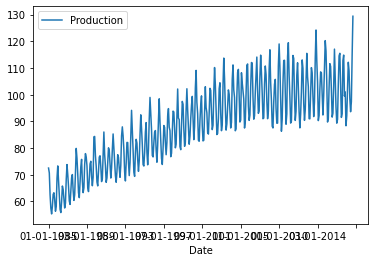

In [5]:
>>> df.plot()

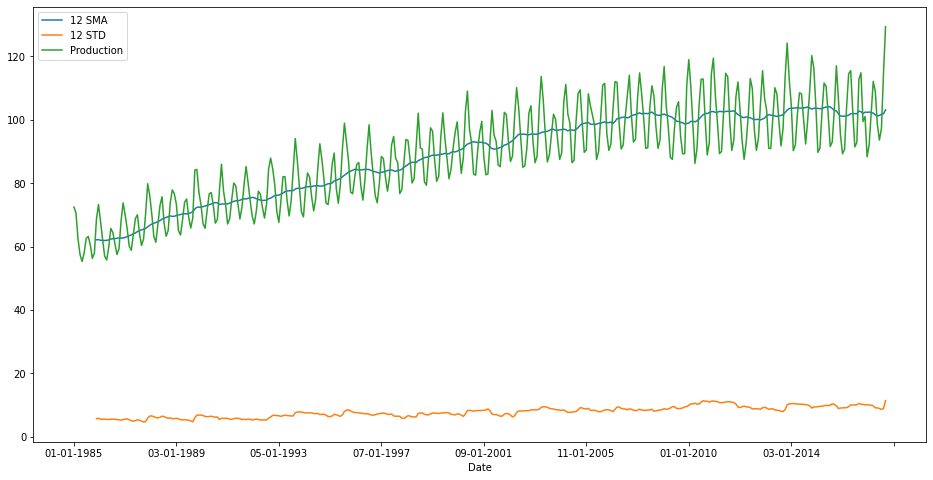

In [6]:
>>> df['Production'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
>>> df['Production'].rolling(12).std().plot(label='12 STD')
>>> df['Production'].plot()
>>> plt.legend()

In [7]:
>>> from statsmodels.tsa.seasonal import seasonal_decompose


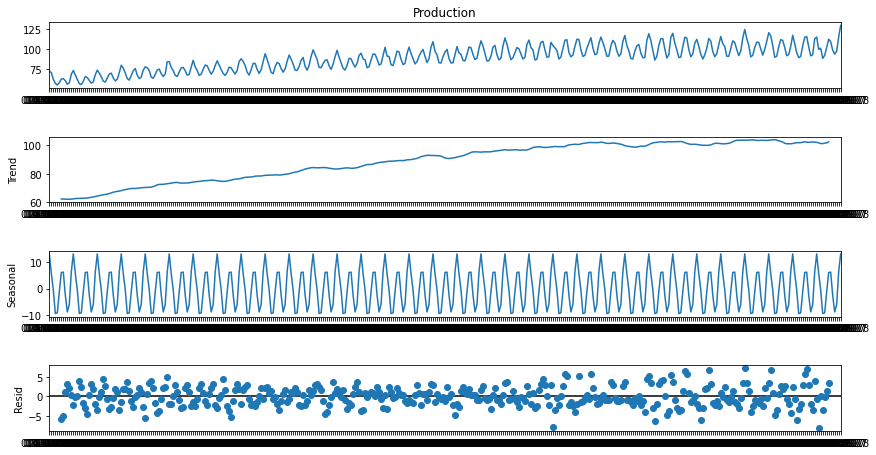

In [8]:
>>> decomp = seasonal_decompose(df['Production'],period=12)
>>> fig = decomp.plot()
>>> fig.set_size_inches(14,7)

In [9]:
>>> from statsmodels.tsa.stattools import adfuller

In [10]:
>>> fuller_test = adfuller(df['Production'])
>>> fuller_test

(-2.2569903500472455,
 0.18621469116586759,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [11]:
>>> def test_p_value(data):
        fuller_test = adfuller(data)
        print('P-value: ',fuller_test[1])
        if fuller_test[1] <= 0.05:
            print('Reject null hypothesis, data is stationary')
        else:
            print('Do not reject null hypothesis, data is not stationary')

In [12]:
>>> test_p_value(df['Production'])

P-value:  0.18621469116586759
Do not reject null hypothesis, data is not stationary


<AxesSubplot:xlabel='Date'>

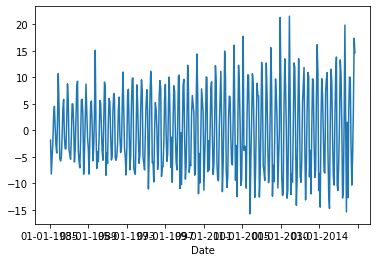

In [13]:
df['First_diff'] = df['Production'] - df['Production'].shift(1)
df['First_diff'].plot()

In [14]:
>>> test_p_value(df['First_diff'].dropna())

P-value:  4.077786565538474e-10
Reject null hypothesis, data is stationary


<AxesSubplot:xlabel='Date'>

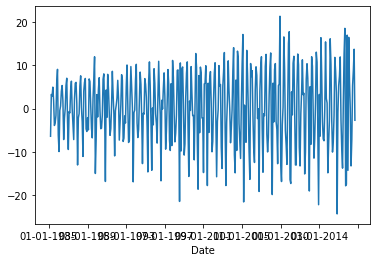

In [15]:
>>> df['Second_diff'] = df['First_diff'] - df['First_diff'].shift(1)
>>> df['Second_diff'].plot()

In [16]:
>>> test_p_value(df['Second_diff'].dropna())

P-value:  4.1836937479957573e-17
Reject null hypothesis, data is stationary


<AxesSubplot:xlabel='Date'>

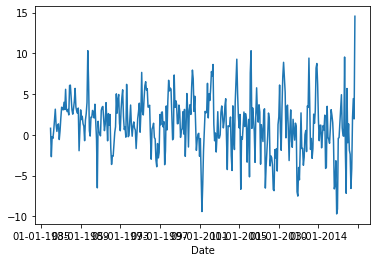

In [17]:
>>> df['Seasonal_diff'] = df['Production'] - df['Production'].shift(12)
>>> df['Seasonal_diff'].plot()

In [18]:
>>> test_p_value(df['Seasonal_diff'].dropna())

P-value:  8.812644938088811e-07
Reject null hypothesis, data is stationary


In [19]:
>>> from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

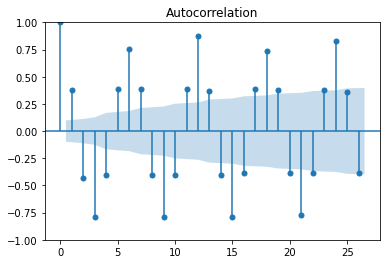

In [20]:
>>> first_diff = plot_acf(df['First_diff'].dropna())

C:\Users\koush\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


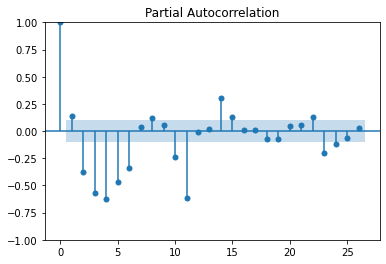

In [21]:
>>> sec_diff = plot_pacf(df['Second_diff'].dropna())

C:\Users\koush\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


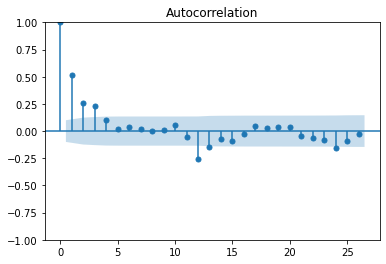

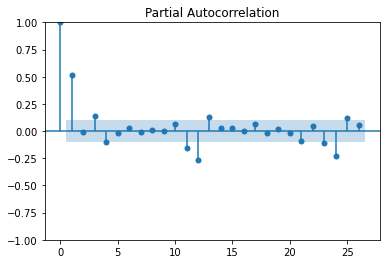

In [22]:
>>> p1 = plot_acf(df['Seasonal_diff'].dropna())
>>> p2 = plot_pacf(df['Seasonal_diff'].dropna())

In [23]:
>>> from statsmodels.tsa.arima_model import ARIMA

In [24]:
>>> model = sm.tsa.statespace.SARIMAX(df['Production'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\koush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\koush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
>>> results = model.fit()
>>> results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Production   No. Observations:                  397
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -928.856
Date:                              Fri, 24 May 2024   AIC                           1863.712
Time:                                      14:30:24   BIC                           1875.564
Sample:                                  01-01-1985   HQIC                          1868.413
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0421      0.058      0.721      0.471      -0.072       0.157
ma.S.L12      -0.7790      0.041    -19.119      0.000      -0.859      -0.699
sigma2         7.1906      0.417     17.245      0.000       6.373       8.008
===================================================================================
Ljung-Box (L1) (Q):                  13.53   Jarque-Bera (JB):                30.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.86   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
>>> results.resid

Date
01-01-1985    72.505200
02-01-1985    -1.833200
03-01-1985    -8.221800
04-01-1985    -4.978800
05-01-1985    -2.156300
                ...    
09-01-2017     0.529985
10-01-2017     4.057874
11-01-2017     0.690663
12-01-2017     2.477697
01-01-2018     6.953533
Length: 397, dtype: float64

<AxesSubplot:xlabel='Date'>

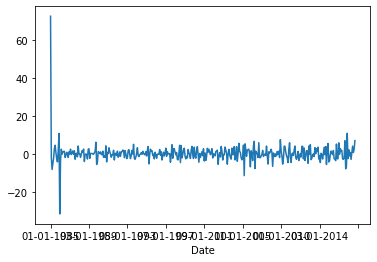

In [27]:
>>> results.resid.plot()

<AxesSubplot:ylabel='Density'>

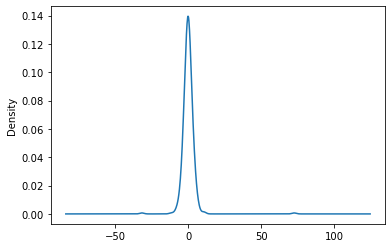

In [28]:
>>> results.resid.plot(kind='kde')

<AxesSubplot:xlabel='Date'>

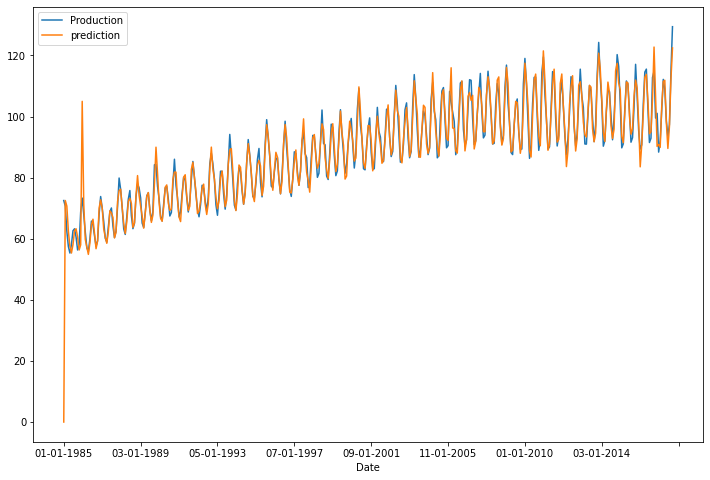

In [29]:
>>> df['prediction'] = results.predict()
>>> df[['Production','prediction']].plot(figsize=(12,8))

In [30]:
>>> from pandas.tseries.offsets import DateOffset
df.index = pd.to_datetime(df.index)
>>> extra_dates = [df.index[-1] + DateOffset(months=m) for m in range (1,24)]

In [31]:
>>> forecast_df = pd.DataFrame(index=extra_dates,columns=df.columns)
>>> forecast_df.head()

,Production,First_diff,Second_diff,Seasonal_diff,prediction
2018-02-01,NaN,NaN,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN


In [32]:
>>> final_df = pd.concat([df,forecast_df])

<AxesSubplot:>

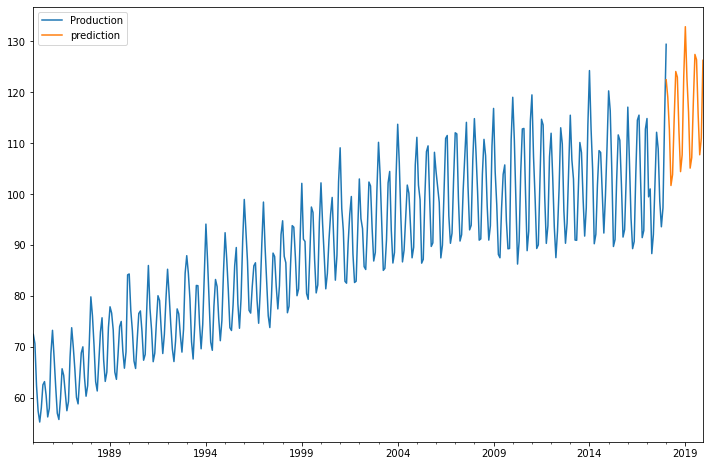

In [33]:
>>> final_df['prediction'] = results.predict(start=396, end=430)
>>> final_df[['Production','prediction']].plot(figsize=(12,8))

In [37]:
# Calculate predictions
start_index=396
end_index=430
final_df['prediction'] = results.predict(start=start_index, end=end_index)

# Select and display the actual production and predictions for the specified range
forecasted_data = final_df.iloc[start_index:end_index + 1]  # Adding 1 to include the end_index
forecasted_data = forecasted_data[['Production', 'prediction']]
print(forecasted_data)


           Production  prediction
2018-01-01   129.4048  122.451267
2018-02-01        NaN  119.058512
2018-03-01        NaN  112.722705
2018-04-01        NaN  101.712002
2018-05-01        NaN  103.848849
2018-06-01        NaN  114.660887
2018-07-01        NaN  124.071660
2018-08-01        NaN  122.958026
2018-09-01        NaN  112.332041
2018-10-01        NaN  104.433610
2018-11-01        NaN  107.715499
2018-12-01        NaN  123.065459
2019-01-01        NaN  132.863193
2019-02-01        NaN  122.728246
2019-03-01        NaN  116.060079
2019-04-01        NaN  105.120014
2019-05-01        NaN  107.189816
2019-06-01        NaN  118.033017
2019-07-01        NaN  127.418929
2019-08-01        NaN  126.394186
2019-09-01        NaN  115.755127
2019-10-01        NaN  107.734601
2019-11-01        NaN  110.997931
2019-12-01        NaN  126.262104


In [36]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(df['Production'],df['prediction']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 4.846015172371131
